In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn')
from matplotlib import rc, font_manager
style.use("fivethirtyeight")
style.use("seaborn-talk")
plt.rcParams['font.family'] = 'serif'

import pickle
import os
import re
import json

from konlpy.tag import Okt 
okt=Okt()

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] =False

/tmp/ipykernel_8737/3168426047.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_8737/3168426047.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-talk")


# wiki

In [2]:
with open(os.path.join("../input/data/wikipedia_documents.json"), "r", encoding="utf-8") as f:
    wiki = json.load(f)
wiki['0'].keys()

dict_keys(['text', 'corpus_source', 'url', 'domain', 'title', 'author', 'html', 'document_id'])

In [3]:
wiki = pd.DataFrame(wiki).T.reset_index(drop=True)
wiki.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [4]:
len(wiki)

60613

## 결측값

In [5]:
wiki.isnull().sum()

text                 0
corpus_source        0
url              56059
domain           60613
title                0
author           60613
html             60613
document_id          0
dtype: int64

- domain, author, html 컬럼은 모두 NaN값 &rarr; 필요없는 컬럼들

In [6]:
wiki['corpus_source'].unique()

array(['위키피디아'], dtype=object)

- corpus_source 컬럼은 모두 '위키피디아' 값으로 이뤄짐 &rarr; 필요없는 컬럼

In [7]:
wiki['url'].unique()

array(['TODO', None], dtype=object)

In [8]:
wiki[wiki.duplicated(['text','title'],keep=False)].sort_values('text')

,text,corpus_source,url,domain,title,author,html,document_id
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,None,None,로봇 배제 표준,None,None,8413
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,TODO,None,로봇 배제 표준,None,None,3859
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,None,None,삼성SDS,None,None,6873
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,TODO,None,삼성SDS,None,None,2319
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 ...",위키피디아,TODO,None,아미타불,None,None,3744
...,...,...,...,...,...,...,...,...
1943,"힌디어(हिन्दी, Hindi)는 인도유럽어족의 인도이란어파에 속하는 언어로, 영...",위키피디아,TODO,None,힌디어,None,None,1943
2553,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,TODO,None,질량-에너지 등가,None,None,2553
7107,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,None,None,질량-에너지 등가,None,None,7107
4542,"치 셰미니 례예 낫재라.\n\n○ 子思子曰, 天命之謂性, 率性之謂道, 修道...",위키피디아,TODO,None,소학언해,None,None,4542


- url 컬럼은 'TODO' or NaN값 &rarr; TODO가 무슨 뜻이지?
    - text와 title 동일한데 url이 TODO/NaN값인 경우 살펴본 결과 → 필요없는 컬럼

In [9]:
len(wiki['document_id'].unique())

60613

- document_id 컬럼은 모두 고유한 값으로 이뤄짐(중복된 값이 없음) → 중복 살펴볼 때 document_id 컬럼 제외하고 살펴보기

In [10]:
wiki.drop(['corpus_source','url','domain','author','html'],axis=1,inplace=True)

In [11]:
wiki.head()

,text,title,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",나라 목록,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,나라 목록,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,백남준,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",아오조라 문고,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,아오조라 문고,4


## 중복값

In [12]:
len(wiki)

60613

In [13]:
len(wiki.drop_duplicates(['text','title']))

56808

In [14]:
wiki=wiki.drop_duplicates(['text','title']).reset_index(drop=True)

In [15]:
len(wiki)

56808

- text,title 컬럼 기준 중복제거한다면 56808개 남음

In [16]:
wiki[wiki.duplicated(['text'],keep=False)].sort_values('text')

,text,title,document_id
45981,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",The Impossible Planet,49786
46036,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",The Satan Pit,49841
1213,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,레닌주의,1213
56458,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,노농동맹,60263
52579,2000년부터 김정일은 독립채산제로 인한 자체 수익 사업을 권장하며 방위산업이든 일...,89호집적회로공장,56384
...,...,...,...
51189,"팀들은 승점 순으로 정렬된다.(승리시 3점, 무승부시 1점, 패배시 0점), 승점 ...",2019-20년 UEFA 유로파리그 조별 리그,54994
39132,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,제4회 G7 정상회담,42937
39127,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,제3회 G7 정상회담,42932
53194,한산도함은 국내 군함 중 최대 규모의 의무실과 병상을 갖췄다. 독도함의 1.8배의 ...,ATH-81 한산도,56999


- text는 동일한데 title이 다른 경우 존재
- text만 동일하면 중복제거하는게 좋을까?
- 우리가 하는 task에서 title을 참고하는 경우가 있을까? 

In [17]:
# 만약 title 상관없이 text가 동일한 경우 중복제거할 때
len(wiki.drop_duplicates(['text']))

56737

In [18]:
wiki=wiki.drop_duplicates(['text']).reset_index(drop=True)

In [19]:
len(wiki)

56737

- text 컬럼 기준 중복제거한다면 56737개 남음

## 토큰화

In [20]:
#pip install transformers==4.29.2

In [21]:
from transformers import AutoTokenizer
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [22]:
tokenizer(wiki['text'].tolist()[0]).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [23]:
wiki['text_token_length']=pd.Series(wiki['text'].tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1133 > 512). Running this sequence through the model will result in indexing errors


Text(0, 0.5, '')

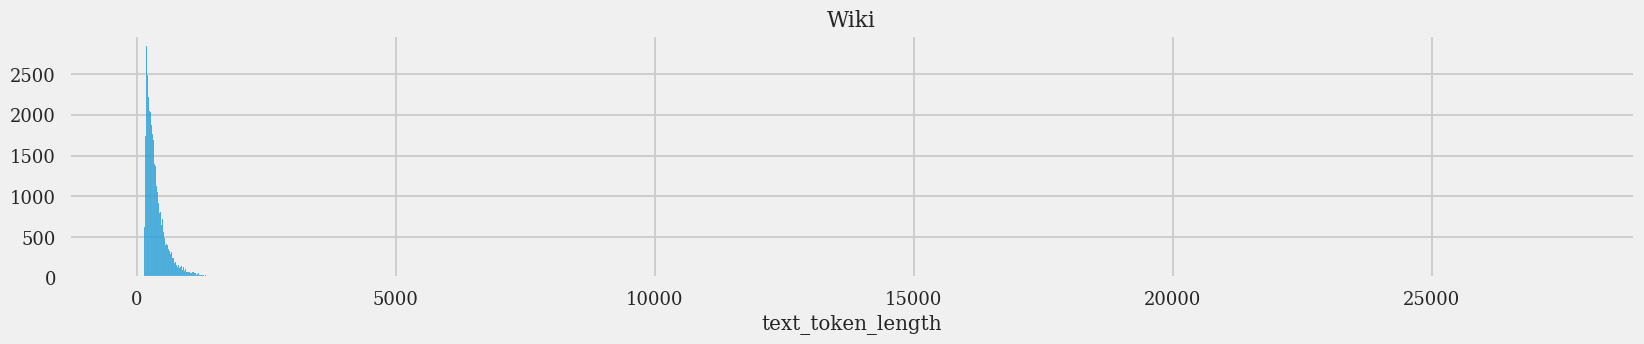

In [24]:
f, ax = plt.subplots(figsize=(18, 3))
sns.histplot(data=wiki['text_token_length'])
ax.set_title('Wiki')
ax.set_ylabel("")

In [25]:
wiki['text_token_length'].describe()

count    56737.000000
mean       403.889208
std        392.152975
min         56.000000
25%        223.000000
50%        310.000000
75%        459.000000
max      27541.000000
Name: text_token_length, dtype: float64

## 텍스트 분석

### 특수문자

In [26]:
special_char=''.join(wiki['text'].apply(lambda x: re.sub(r'[\w\s]','',x)).values)

In [27]:
set(special_char)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x95',
 '¡',
 '¢',
 '£',
 '¥',
 '§',
 '¨',
 '«',
 '¬',
 '\xad',
 '®',
 '°',
 '±',
 '´',
 '¶',
 '·',
 '»',
 '¿',
 '×',
 '÷',
 '˕',
 '˚',
 '˝',
 '˥',
 '˦',
 '˧',
 '˩',
 '˪',
 '̀',
 '́',
 '̂',
 '̃',
 '̄',
 '̈',
 '̊',
 '̌',
 '̍',
 '̚',
 '̝',
 '̞',
 '̟',
 '̠',
 '̡',
 '̣',
 '̥',
 '̩',
 '̪',
 '̯',
 '̰',
 '̱',
 '̴',
 '̷',
 '̻',
 '̽',
 '͡',
 '΄',
 '՝',
 '։',
 '֖',
 '֥',
 'ְ',
 'ֱ',
 'ִ',
 'ֵ',
 'ֶ',
 'ַ',
 'ָ',
 'ֹ',
 'ּ',
 'ֽ',
 'ֿ',
 'ׁ',
 'ׂ',
 'ׇ',
 'ً',
 'ٍ',
 'َ',
 'ُ',
 'ِ',
 'ّ',
 'ْ',
 'ٔ',
 'ަ',
 'ި',
 'ު',
 'ެ',
 'ް',
 'ࠝ',
 'ࠠ',
 'ࠩ',
 'ँ',
 'ं',
 'ः',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'े',
 'ॉ',
 'ो',
 'ौ',
 '्',
 'ং',
 '়',
 'া',
 'ি',
 'ী',
 'ু',
 'ে',
 'ো',
 '্',
 'ਂ',
 'ਾ',
 'ਿ',
 'ੀ',
 'ੋ',
 'ੰ',
 'ି',
 'ா',
 'ி',
 'ீ',
 'ு',
 'ூ',
 'ெ',
 'ே',
 'ை',
 'ொ',
 'ோ',
 '்',
 'ి',


### 외국어

In [28]:
foreign=''.join(wiki['text'].apply(lambda x: re.sub(r'[A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ0-9]','',re.sub(r'[^\w]','',x))).values)

In [29]:
set(foreign)

{'淵',
 '瑟',
 '吻',
 '澧',
 '舐',
 '別',
 'ཁ',
 '貝',
 '倆',
 '娠',
 '禑',
 'พ',
 '孺',
 '同',
 'ᄴ',
 'Т',
 '閘',
 '守',
 '鍮',
 '⑨',
 '圉',
 '綦',
 '猪',
 'ᅊ',
 '罰',
 '繫',
 '蜜',
 '霞',
 '家',
 '语',
 'ぉ',
 '增',
 '釂',
 '動',
 '稙',
 'Я',
 '戛',
 '迓',
 '圓',
 '猟',
 '豚',
 '控',
 '殖',
 '沐',
 '諺',
 '变',
 '蝶',
 '箋',
 '苻',
 '沖',
 '瓘',
 '況',
 '仞',
 '昻',
 '煉',
 'ힼ',
 '穴',
 '暿',
 'ප',
 '默',
 '昔',
 '静',
 'т',
 '諭',
 '琤',
 '焼',
 '摺',
 'ퟌ',
 '老',
 '矿',
 '鈑',
 '融',
 'ᆊ',
 '㫜',
 '死',
 '採',
 '椅',
 '狎',
 '疎',
 '筮',
 '粉',
 'ᇸ',
 '面',
 'ɡ',
 '枪',
 '寒',
 '履',
 '琪',
 '漑',
 '間',
 '紙',
 'ᠢ',
 '皋',
 '癖',
 'ᠡ',
 'Ё',
 '辦',
 '友',
 '鉅',
 '張',
 'ḷ',
 '澶',
 'ɖ',
 'ي',
 '駕',
 '埵',
 '豪',
 '萠',
 '跪',
 '滷',
 '連',
 'ㆁ',
 '蘗',
 '進',
 '依',
 '儳',
 '躩',
 'ꥨ',
 'ἰ',
 '互',
 '筑',
 'Ե',
 '妬',
 '琳',
 '荖',
 'ꥡ',
 '肃',
 '篠',
 '曌',
 '携',
 '壑',
 '廄',
 'ŵ',
 '鞠',
 'ꥪ',
 '疇',
 '闸',
 '郴',
 '究',
 '漸',
 '隙',
 '寬',
 '堡',
 '徒',
 '惠',
 '賈',
 '躅',
 'η',
 '膚',
 '擦',
 '沛',
 '瓠',
 '畇',
 'Ἵ',
 '床',
 '付',
 '绕',
 '醸',
 'И',
 '肪',
 'ඩ',
 '𐀀',
 '畠',
 '甿',
 '螳',
 '復',
 '虛'

### 자음, 모음

In [30]:
wiki['one_word']=wiki['text'].apply(lambda x: (re.findall(r'[ㄱ-ㅎㅏ-ㅣ]',x)))
L=[]
for i in range(len(wiki)):
    L.extend(wiki.loc[i,'one_word'])

In [31]:
len(L)

1725

In [32]:
set(L)

{'ㄱ',
 'ㄲ',
 'ㄳ',
 'ㄴ',
 'ㄵ',
 'ㄶ',
 'ㄷ',
 'ㄸ',
 'ㄹ',
 'ㄺ',
 'ㄻ',
 'ㄼ',
 'ㄽ',
 'ㄾ',
 'ㄿ',
 'ㅀ',
 'ㅁ',
 'ㅂ',
 'ㅃ',
 'ㅄ',
 'ㅅ',
 'ㅆ',
 'ㅇ',
 'ㅈ',
 'ㅉ',
 'ㅊ',
 'ㅋ',
 'ㅌ',
 'ㅍ',
 'ㅎ',
 'ㅏ',
 'ㅐ',
 'ㅑ',
 'ㅒ',
 'ㅓ',
 'ㅔ',
 'ㅕ',
 'ㅖ',
 'ㅗ',
 'ㅘ',
 'ㅙ',
 'ㅚ',
 'ㅛ',
 'ㅜ',
 'ㅝ',
 'ㅞ',
 'ㅟ',
 'ㅠ',
 'ㅡ',
 'ㅢ',
 'ㅣ'}

# train/valid

In [33]:
#pip install datasets==2.12.0

In [34]:
# train_dataset을 불러오고 싶은 경우
from datasets import load_from_disk
train_dataset = load_from_disk("../input/data/train_dataset/")

- id: 질문의 고유 id
- question: 질문
- answers: 답변에 대한 정보. 하나의 질문에 하나의 답변만 존재함
    - answer_start : 답변의 시작 위치
    - text: 답변의 텍스트
- context: 답변이 포함된 문서
- title: 문서의 제목
- document_id: 문서의 고유 id

In [35]:
train=pd.DataFrame({'title':train_dataset['train']['title'], 'context':train_dataset['train']['context'], 'question':train_dataset['train']['question'], 'id':train_dataset['train']['id'], 'answers':train_dataset['train']['answers'], 'document_id':train_dataset['train']['document_id'], '__index_level_0__':train_dataset['train']['__index_level_0__']})
valid=pd.DataFrame({'title':train_dataset['validation']['title'], 'context':train_dataset['validation']['context'], 'question':train_dataset['validation']['question'], 'id':train_dataset['validation']['id'], 'answers':train_dataset['validation']['answers'], 'document_id':train_dataset['validation']['document_id'], '__index_level_0__':train_dataset['validation']['__index_level_0__']})

## 결측값

In [36]:
train.isnull().sum()

title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

In [37]:
valid.isnull().sum()

title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

In [38]:
len(train)

3952

In [39]:
len(valid)

240

In [40]:
train.columns

Index(['title', 'context', 'question', 'id', 'answers', 'document_id',
       '__index_level_0__'],
      dtype='object')

In [41]:
valid.columns

Index(['title', 'context', 'question', 'id', 'answers', 'document_id',
       '__index_level_0__'],
      dtype='object')

## 중복값

In [42]:
print(f"train 길이: {len(train)}")
print("-"*50)
print(f"질문의 고유 id: {len(train['id'].unique())}")
print(f"고유한 질문 개수 id: {len(train['question'].unique())}")
print("-"*50)
print(f"문서의 고유 id: {len(train['document_id'].unique())}")
print(f"고유한 문서 개수 id: {len(train['context'].unique())}")
print("-"*50)
print(f"고유한 제목 개수 id: {len(train['title'].unique())}")

train 길이: 3952
--------------------------------------------------
질문의 고유 id: 3952
고유한 질문 개수 id: 3952
--------------------------------------------------
문서의 고유 id: 3340
고유한 문서 개수 id: 3340
--------------------------------------------------
고유한 제목 개수 id: 2716


In [43]:
print(f"valid 길이: {len(valid)}")
print("-"*50)
print(f"질문의 고유 id: {len(valid['id'].unique())}")
print(f"고유한 질문 개수 id: {len(valid['question'].unique())}")
print("-"*50)
print(f"문서의 고유 id: {len(valid['document_id'].unique())}")
print(f"고유한 문서 개수 id: {len(valid['context'].unique())}")
print("-"*50)
print(f"고유한 제목 개수 id: {len(valid['title'].unique())}")

valid 길이: 240
--------------------------------------------------
질문의 고유 id: 240
고유한 질문 개수 id: 240
--------------------------------------------------
문서의 고유 id: 235
고유한 문서 개수 id: 235
--------------------------------------------------
고유한 제목 개수 id: 228


In [44]:
len(train['__index_level_0__'].unique())

3120

- __index_level_0__ 컬럼은 뭘까?

## 정답 시작 위치

In [45]:
train['answers']

0               {'answer_start': [235], 'text': ['하원']}
1         {'answer_start': [212], 'text': ['《경영의 실제》']}
2               {'answer_start': [510], 'text': ['백성']}
3               {'answer_start': [625], 'text': ['중국']}
4                {'answer_start': [30], 'text': ['4개']}
                             ...                       
3947         {'answer_start': [317], 'text': ['지질 구조']}
3948           {'answer_start': [616], 'text': ['뉴저지']}
3949        {'answer_start': [255], 'text': ['칼 에케르트']}
3950        {'answer_start': [476], 'text': ['슬라브 신화']}
3951    {'answer_start': [189], 'text': ['크리스토포 알하우스']}
Name: answers, Length: 3952, dtype: object

In [46]:
train['answer_start']=train['answers'].apply(lambda x: x['answer_start'][0])
train['answer_text']=train['answers'].apply(lambda x: x['text'][0])

valid['answer_start']=valid['answers'].apply(lambda x: x['answer_start'][0])
valid['answer_text']=valid['answers'].apply(lambda x: x['text'][0])

Text(0, 0.5, '')

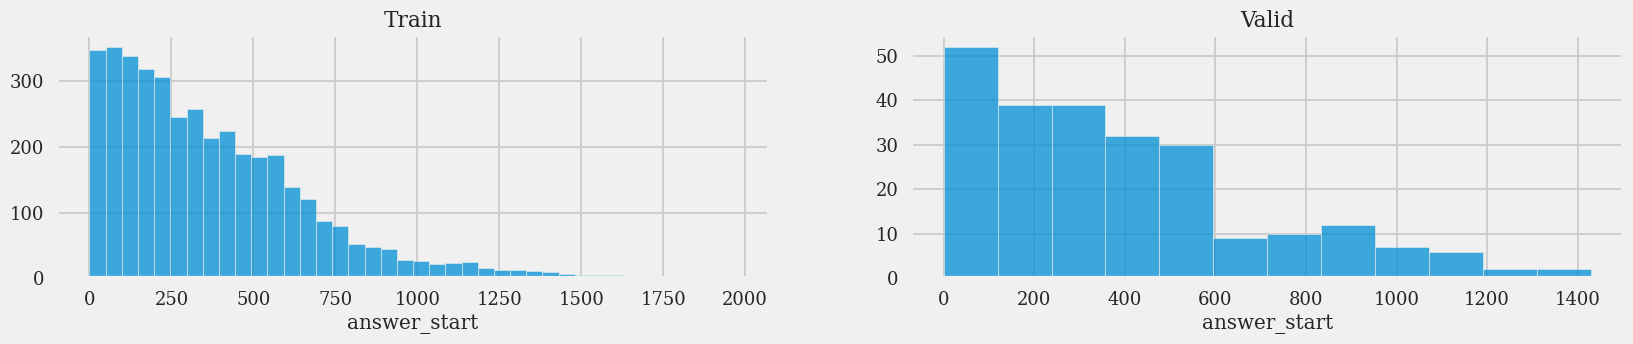

In [47]:
f, ax = plt.subplots(1,2,figsize=(18, 3))
sns.histplot(data=train['answer_start'],ax=ax[0])
ax[0].set_title('Train')
ax[0].set_ylabel("")

sns.histplot(data=valid['answer_start'],ax=ax[1])
ax[1].set_title('Valid')
ax[1].set_ylabel("")

- train, valid에서 정답 시작 위치는 비슷한 양상 보임
- train, valid 모두 위치가 초반일수록 정답이 많이 나옴

## 토큰화

In [48]:
from transformers import AutoTokenizer
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [49]:
tokenizer(train['context'].tolist()[0]).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

### context

In [50]:
train['context_token_length']=pd.Series(train['context'].tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))
valid['context_token_length']=pd.Series(valid['context'].tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1022 > 512). Running this sequence through the model will result in indexing errors


Text(0, 0.5, '')

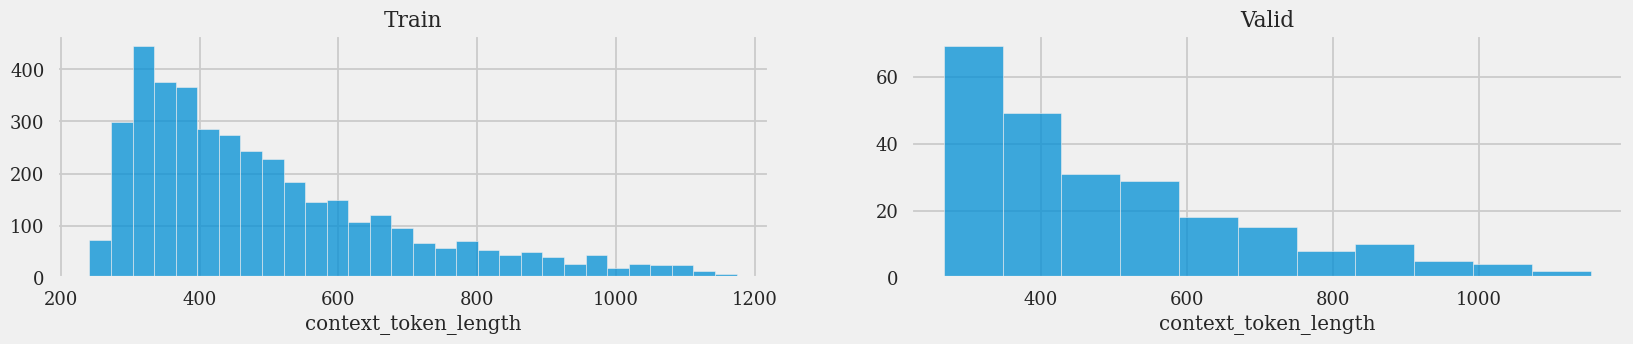

In [51]:
f, ax = plt.subplots(1,2,figsize=(18, 3))
sns.histplot(data=train['context_token_length'],ax=ax[0])
ax[0].set_title('Train')
ax[0].set_ylabel("")

sns.histplot(data=valid['context_token_length'],ax=ax[1])
ax[1].set_title('Valid')
ax[1].set_ylabel("")

In [52]:
train['context_token_length'].describe()

count    3952.000000
mean      497.301619
std       193.801724
min       241.000000
25%       348.000000
50%       444.000000
75%       594.000000
max      1174.000000
Name: context_token_length, dtype: float64

In [53]:
valid['context_token_length'].describe()

count     240.000000
mean      496.304167
std       197.632311
min       267.000000
25%       341.250000
50%       435.500000
75%       599.250000
max      1153.000000
Name: context_token_length, dtype: float64

- train, valid는 context의 토큰화 길이가 비슷한 양상 보임

Text(0, 0.5, '')

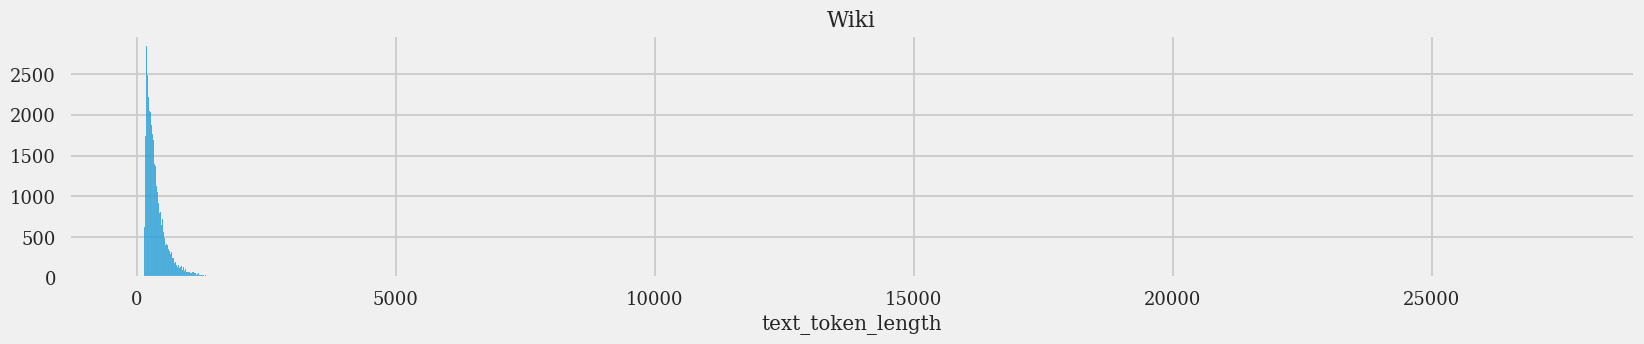

In [54]:
f, ax = plt.subplots(figsize=(18, 3))
sns.histplot(data=wiki['text_token_length'])
ax.set_title('Wiki')
ax.set_ylabel("")

In [55]:
wiki['text_token_length'].describe()

count    56737.000000
mean       403.889208
std        392.152975
min         56.000000
25%        223.000000
50%        310.000000
75%        459.000000
max      27541.000000
Name: text_token_length, dtype: float64

- wiki와도 비교해보기 → train,valid와 비슷한듯

### question

In [56]:
train['question_token_length']=pd.Series(train['question'].tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))
valid['question_token_length']=pd.Series(valid['question'].tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))

Text(0, 0.5, '')

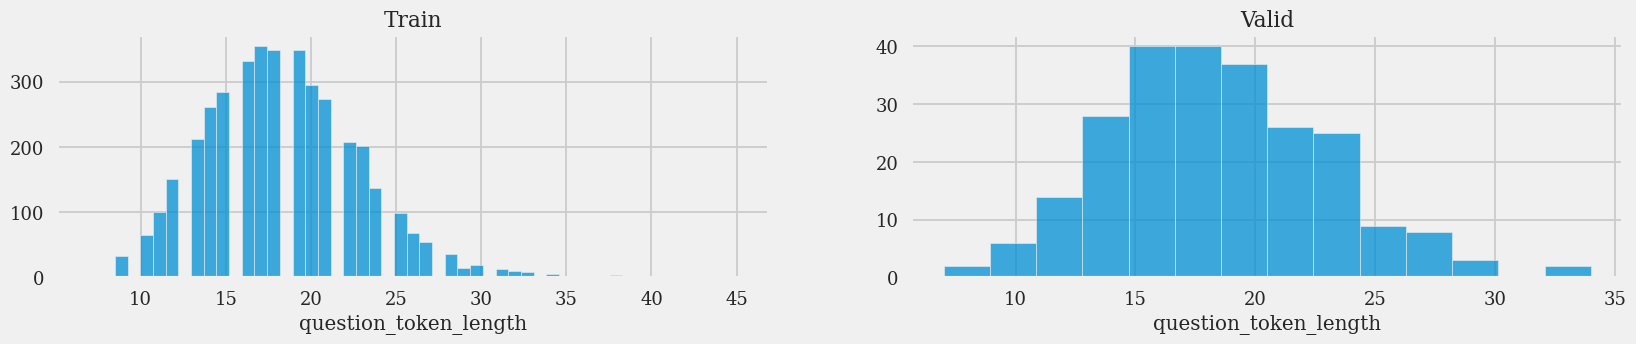

In [57]:
f, ax = plt.subplots(1,2,figsize=(18, 3))
sns.histplot(data=train['question_token_length'],ax=ax[0])
ax[0].set_title('Train')
ax[0].set_ylabel("")

sns.histplot(data=valid['question_token_length'],ax=ax[1])
ax[1].set_title('Valid')
ax[1].set_ylabel("")

In [58]:
train['question_token_length'].describe()

count    3952.000000
mean       18.298330
std         4.544425
min         7.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        45.000000
Name: question_token_length, dtype: float64

In [59]:
valid['question_token_length'].describe()

count    240.000000
mean      18.316667
std        4.707305
min        7.000000
25%       15.000000
50%       18.000000
75%       21.000000
max       34.000000
Name: question_token_length, dtype: float64

- train, valid는 question의 토큰화 길이가 비슷한 양상 보임

### question + context

In [60]:
train['question+context_token_length']=pd.Series((train['question']+'[SEP]'+train['context']).tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))
valid['question+context_token_length']=pd.Series((train['question']+'[SEP]'+train['context']).tolist()).apply(lambda x: len(tokenizer(x)['input_ids']))

Text(0, 0.5, '')

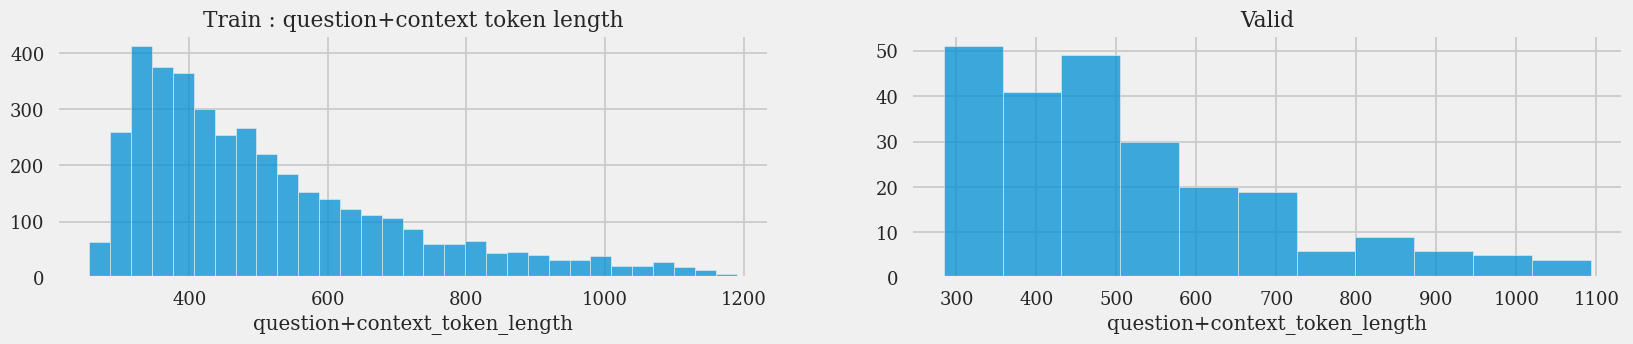

In [61]:
f, ax = plt.subplots(1,2,figsize=(18, 3))
sns.histplot(data=train['question+context_token_length'],ax=ax[0])
ax[0].set_title('Train : question+context token length')
ax[0].set_ylabel("")

sns.histplot(data=valid['question+context_token_length'],ax=ax[1])
ax[1].set_title('Valid')
ax[1].set_ylabel("")

In [62]:
train['question_token_length'].describe()

count    3952.000000
mean       18.298330
std         4.544425
min         7.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        45.000000
Name: question_token_length, dtype: float64

In [63]:
valid['question_token_length'].describe()

count    240.000000
mean      18.316667
std        4.707305
min        7.000000
25%       15.000000
50%       18.000000
75%       21.000000
max       34.000000
Name: question_token_length, dtype: float64

- train, valid는 question+context의 토큰화 길이가 비슷한 양상 보임

## 텍스트 분석
question 중심으로

In [64]:
train['question'][:50]

0             대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?
1                       현대적 인사조직관리의 시발점이 된 책은?
2               강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?
3      11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?
4                   명문이 적힌 유물을 구성하는 그릇의 총 개수는?
5                   카드모스의 부하들이 간 곳에는 무엇이 있었는가?
6                        관우를 불태워 죽이려한 사람 누구인가?
7                   참호 속에 무기와 장비를 버리고 도주한 집단은?
8                     제2차 세계 대전에 참전하여 사망한 자식은?
9          고려 공민왕이 처가 식구들과 아내와 함께 피신처로 삼은 마을은?
10                               정여창은 어떻게 죽었나?
11                  아멜리아는 빅토르의 직업을 무엇으로 착각하나요?
12                     우핑가스 왕조의 이름은 어디서 유래하였나?
13                           장면이 한국으로 돌아온 년도는?
14                     유대교의 지나친 차별을 타파하려한 사람은?
15                   권번에서 요릿집에 제공한 기생 명부의 이름은?
16           영국군 약 42만명의 사상자가 발생한 전투가 시작된 연도는?
17                 웨이크필드가 15번째 시즌에 활약한 팀의 이름은?
18               김상옥이 종로경찰서에 폭탄을 던진 직후 피신한 곳은?
19                  윤치호가 극찬했던 조선시대의 인물은 누구인가요?
20              항우가 진나라를 멸하면서 조왕 헐은 어디로 이동했는가?
21     30일에 한

In [65]:
def question_keyword1(df2, question_df, pattern):
  df2['q1']=df2['question'].apply(lambda x: len(re.findall(pattern,x)))
  df1=df2[df2['q1']!=0].reset_index(drop=True)
  df2=df2[df2['q1']==0].reset_index(drop=True)
  print(len(df1))
  print(len(df2))
  df1['keyword']=df1['question'].apply(lambda x: re.findall(pattern,x)[0])
  question_df=pd.concat([question_df,df1.copy()]).reset_index(drop=True)
  return df2, question_df

In [66]:
def question_keyword2(df2, question_df, pattern):
  df2['q1']=df2['question'].apply(lambda x: len(re.findall(pattern,x)))
  df1=df2[df2['q1']!=0].reset_index(drop=True)
  df2=df2[df2['q1']==0].reset_index(drop=True)
  print(len(df1))
  print(len(df2))
  df1['keyword']=df1['question'].apply(lambda x: ''.join(okt.nouns(re.findall(pattern,x)[0])))
  question_df=pd.concat([question_df,df1.copy()]).reset_index(drop=True)
  return df2, question_df

### "은/는?" 앞에 오는 단어

In [67]:
df2, question_df=question_keyword1(train, pd.DataFrame(), r'\w+(?=[은는]\?)')
df2,question_df=question_keyword1(df2,question_df, r'\w+(?=[은는]$)')

2410
1542
1
1541


### "어떠한" 뒤에 오는 명사

In [68]:
df2,question_df=question_keyword2(df2,question_df, r'(?<=어떠한 )\w+')

10
1531


### "어떤" 뒤에 오는 명사

In [69]:
df2,question_df=question_keyword2(df2,question_df, r'(?<=어떤 )\w+')
df2,question_df=question_keyword2(df2,question_df, r'(?<=어떤)\w+')

170
1361
1
1360


### "무슨" 뒤에 오는 명사

In [70]:
df2,question_df=question_keyword2(df2,question_df, r'(?<=무슨 )\w+')
df2,question_df=question_keyword2(df2,question_df, r'(?<=무슨)\w+')

14
1346
2
1344


### "어느" 뒤에 오는 명사

In [71]:
df2,question_df=question_keyword2(df2,question_df, r'(?<=어느 )\w+')
df2,question_df=question_keyword2(df2,question_df, r'(?<=어느)\w+')

103
1241
5
1236


### "몇" 뒤에 오는 명사

In [72]:
df2,question_df=question_keyword2(df2,question_df, r'(?<=몇 )\w+')
df2,question_df=question_keyword2(df2,question_df, r'(?<=몇)\w+')

84
1152
13
1139


### 누구

In [73]:
df2,question_df=question_keyword1(df2,question_df, r'누구')

305
834


### 어디

In [74]:
df2,question_df=question_keyword1(df2,question_df, r'어디')

202
632


### 무엇

In [75]:
df2,question_df=question_keyword1(df2,question_df, r'무엇')

407
225


### 언제

In [76]:
df2,question_df=question_keyword1(df2,question_df, r'언제')

134
91


### 누가

In [77]:
df2,question_df=question_keyword1(df2,question_df, r'누가')

34
57


### 어떻게

In [78]:
df2,question_df=question_keyword1(df2,question_df, r'어떻게')

10
47


### 왜

In [79]:
df2,question_df=question_keyword1(df2,question_df, r'왜')

1
46


### 얼마

In [80]:
df2,question_df=question_keyword1(df2,question_df, r'얼마')

26
20


### 뭐

In [81]:
df2,question_df=question_keyword1(df2,question_df, r'뭐')

12
8


### 며칠

In [82]:
df2,question_df=question_keyword1(df2,question_df, r'며칠')

3
5


자주 나오는 keyword

In [88]:
question_df['keyword'].value_counts()[:20]

keyword
무엇    407
누구    305
사람    232
인물    208
어디    202
것     191
언제    134
곳     121
해     119
나라     77
이름     73
년도     48
시기     46
국가     45
연도     36
지역     36
이유     36
누가     34
기관     27
얼마     26
Name: count, dtype: int64

### 나머지(keyword 설정 못한 data)
- 5개 행만 남음

In [84]:
df2['question']

0    husroum (حصروم)을 페르시아어로 번역하면?
1               아제르 상귀니스를 아람어로 하면?
2         보현암 석조관음보살의 보존 상태는 어떠한가?
3                   잉카제국의 마지막 왕은 ?
4         강희제는 장병 간의 관계가 어떻다고 믿었나?
Name: question, dtype: object

# train/valid & wiki 비교

In [85]:
train[0:1]

,title,context,question,id,answers,document_id,__index_level_0__,answer_start,answer_text,context_token_length,question_token_length,question+context_token_length,q1
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,235,하원,436,18,453,1


In [86]:
wiki[wiki['document_id']==18293]

,text,title,document_id,text_token_length,one_word
14489,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,미국 상원,18293,436,[]


- (train/valid의 document_id 컬럼) == (wiki의 document_id 컬럼) → 당연한거지만 혹시 몰라 확인해봄